## MODULOS

In [1]:
# Gráficas interactivas en python
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid') #alternative
plt.rcParams['figure.dpi'] = 300
import plotly.express as px
#from IPython.display import HTML
from matplotlib import pyplot
#pyplot.rcParams['figure.dpi'] = 100
from statsmodels.graphics.tsaplots import plot_pacf
# Modulo para visualización de datos estadísticos
import seaborn as sns
# Modulo para utilizar herramientas estadísticas: distribuciones, estadísticas descriptivas, test estadísticos, etc.
import scipy.stats as scs
# Similar a scipy.stats
import statsmodels.api as sm
from scipy.stats import norm
%matplotlib inline
%config InlineBackend.figure_format ='retina'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## PARAMETROS

In [3]:
# Número de subintervalos
N = 1000
# Horizonte de tiempo (hasta donde vamos a graficar las trayectorias)
# T = 1.  
# Tamaño del incremento
# dt = T/N
# Frecuencia de los datos
dt = 1/252 # diarios
# Replicabilidad de resultados
# np.random.seed(100)
# Número de simulaciones
n_sims = 1
# Intervalo de tiempo
tims = np.linspace(0, N, N+1)
tim = tims*dt
# Rendimientos instantáneos promedio anualizados (si trabajamos con datos anualizados 1/252)
# Rendimiento promedio anualizado
mu = 0.07
# Volatilidad promedio anualizada
sigma = 0.15

# Condición inicial del proceso
mbg_0 = 100

## Simulaciones

In [4]:
# MBE

dB = np.random.normal(scale= np.sqrt(dt), size=(n_sims, N))
B = np.cumsum(dB, axis=1)
mbe = np.insert(B, 0, 0.0, axis=1)

# Sln Exacta Discretizada

mbg_se = mbg_0*np.exp((mu-0.5*sigma**2)*tim + sigma*mbe)

# Sln Numerica Euler-Maruyama

mbg_sn1 = mbg_0*np.cumprod(1+mu*dt+sigma*dB, axis=1)
mbg_sn = np.insert(mbg_sn1, 0, mbg_0, axis=1)


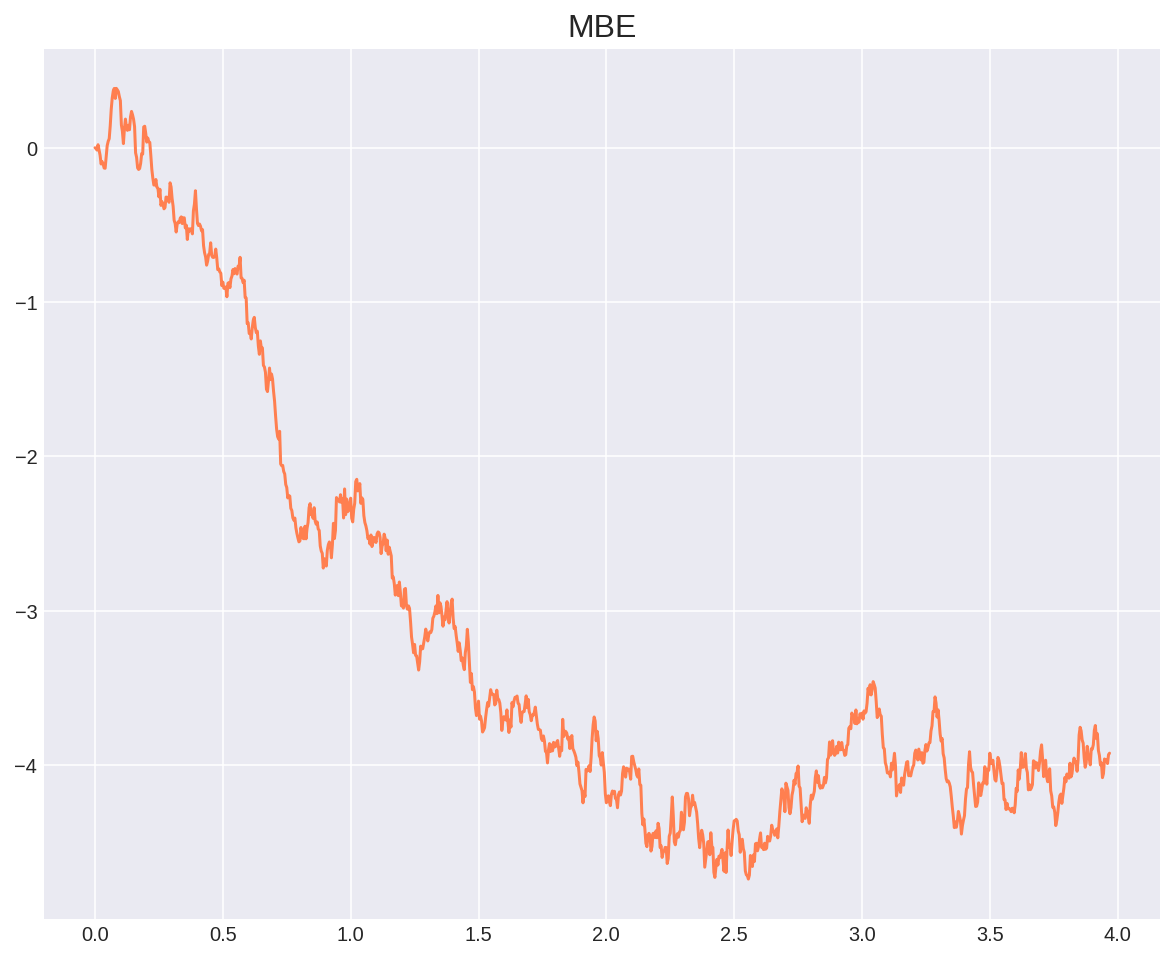

In [5]:
# Gráfica MBE
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('MBE', fontsize=16)
ax.plot(tim, np.transpose(mbe),'coral')
ax.grid(True)

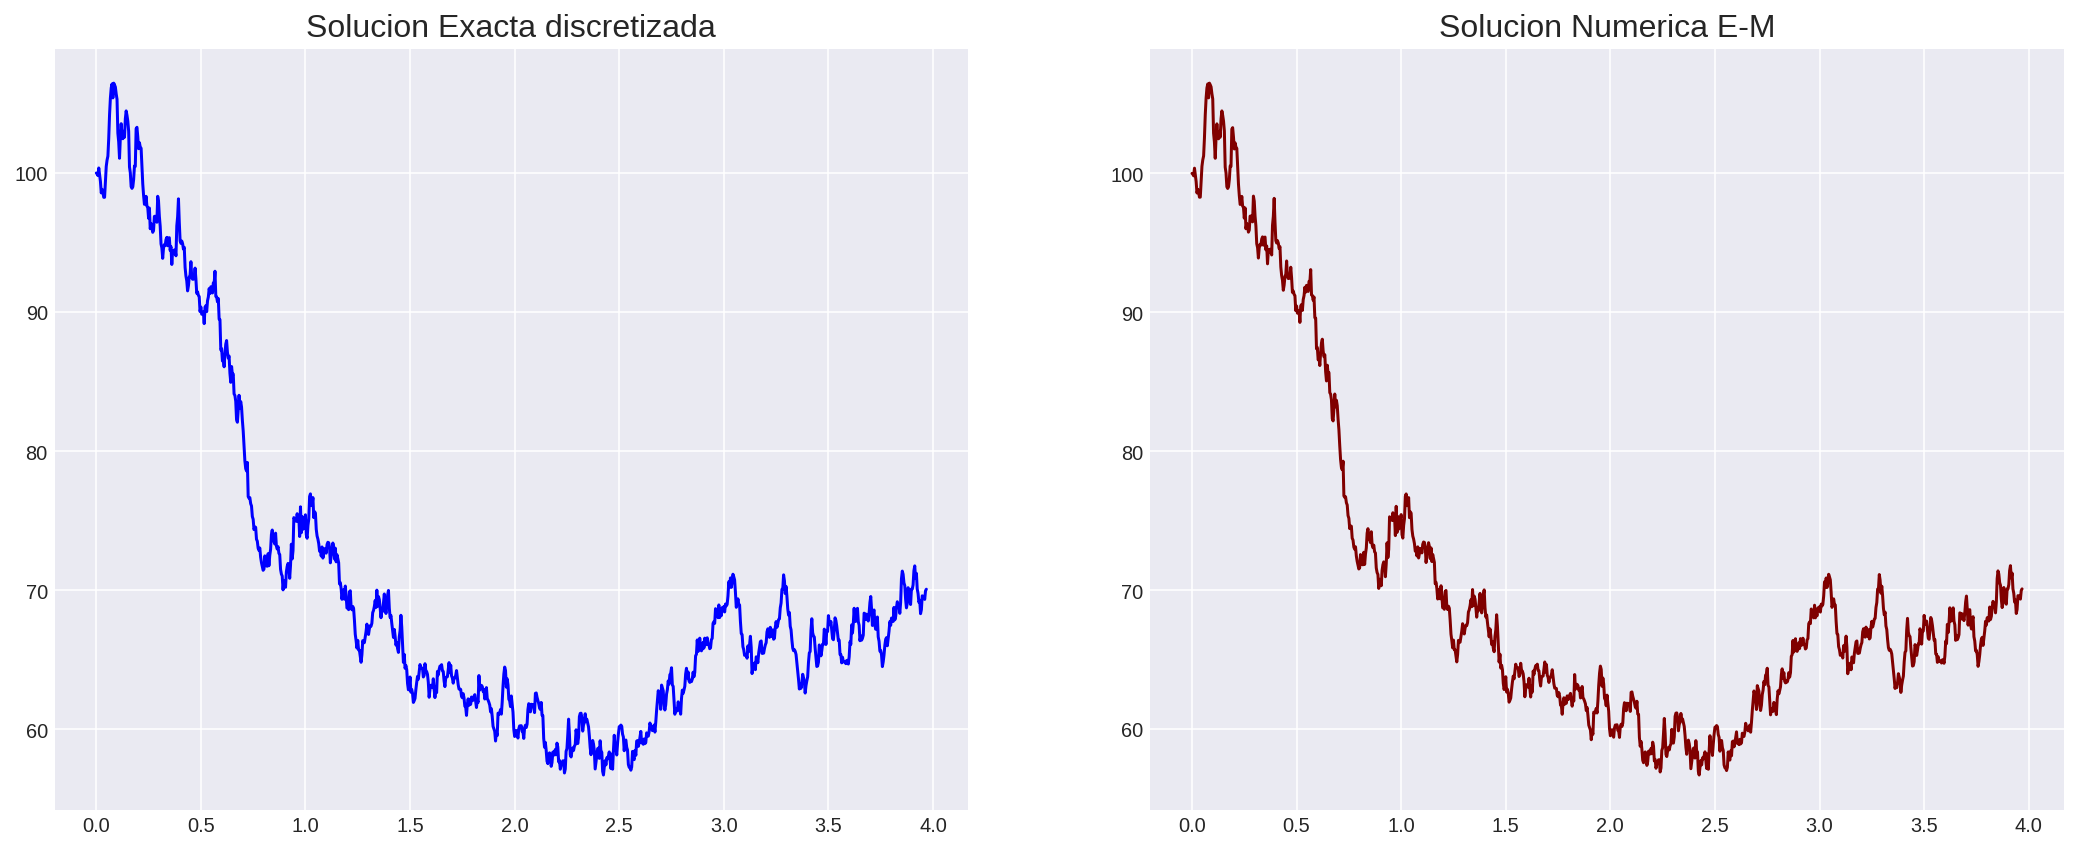

In [6]:
# Gráfica
fig, ax = plt.subplots(1,2, figsize=(18,7))
ax[0].set_title('Solucion Exacta discretizada', fontsize=16)
ax[1].set_title('Solucion Numerica E-M', fontsize=16)
ax[0].plot(tim, np.transpose(mbg_se), 'blue')
ax[1].plot(tim, np.transpose(mbg_sn), 'maroon')
# Línea de tendencia
#ax[0].plot(tim, mbg_0*np.exp(mu*tim), 'g')
#ax[1].plot(tim, mbg_0*np.exp(mu*tim), 'g')
ax[0].grid(True)
ax[1].grid(True)

In [7]:
# Dataframe datos
mbg_df = pd.DataFrame({'time': tim, 'mbg_se': mbg_se.reshape(N+1), 'mbg_sn': mbg_sn.reshape(N+1)})
mbg_df

,time,mbg_se,mbg_sn
0,0.000000,100.000000,100.000000
1,0.003968,99.934191,99.938633
2,0.007937,99.815808,99.824637
3,0.011905,100.362231,100.374074
4,0.015873,99.860992,99.876001
...,...,...,...
996,3.952381,69.541154,69.548224
997,3.956349,69.568050,69.578223
998,3.960317,69.344797,69.357684
999,3.964286,69.961996,69.975363


In [8]:
# Gráfica Sln Exacta discretizada vs Sln Numerica E-M
fig = px.line(mbg_df, x='time', y=['mbg_se', 'mbg_sn'], title='Sln Exacta vs Sln Numerica', width=1024, height=720)
fig.show()

## TEST ESTADISTICOS PARA DETERMINAR SI UNA BASE DE DATOS 
## SE PUEDE MODELAR COMO UN MBG

## IDENTIFICACION

In [15]:
# Función para calcular los estadisticos descriptivos:

def calc_stats(b1):
  ''' Calcula estadísticos de interés.

  Parámetros
  ==============
  b1: base datos
  '''
  desc1 = scs.describe(b1)
  print('%14s %14s' % ('Estadísticos', 'Valores'))
  print(30 * "-")
  print('%14s %14.3f' % ('tamano', desc1[0]))
  print('%14s %14.3f' % ('min', desc1[1][0]))
  print('%14s %14.3f' % ('max', desc1[1][1]))
  print('%14s %14.3f' % ('media', desc1[2]))
  print('%14s %14.3f' % ('desv', np.sqrt(desc1[3])))
  print('%14s %14.3f' % ('sesg', desc1[4]))
  print('%14s %14.3f' % ('kurt', desc1[5]+3))

In [16]:
# Estadísticas descriptivas datos simulados
calc_stats(mbg_sn.reshape(N+1))

  Estadísticos        Valores
------------------------------
        tamano       1001.000
           min         78.872
           max        134.863
         media        100.966
          desv         12.574
          sesg          0.554
          kurt          3.025


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Histograma')

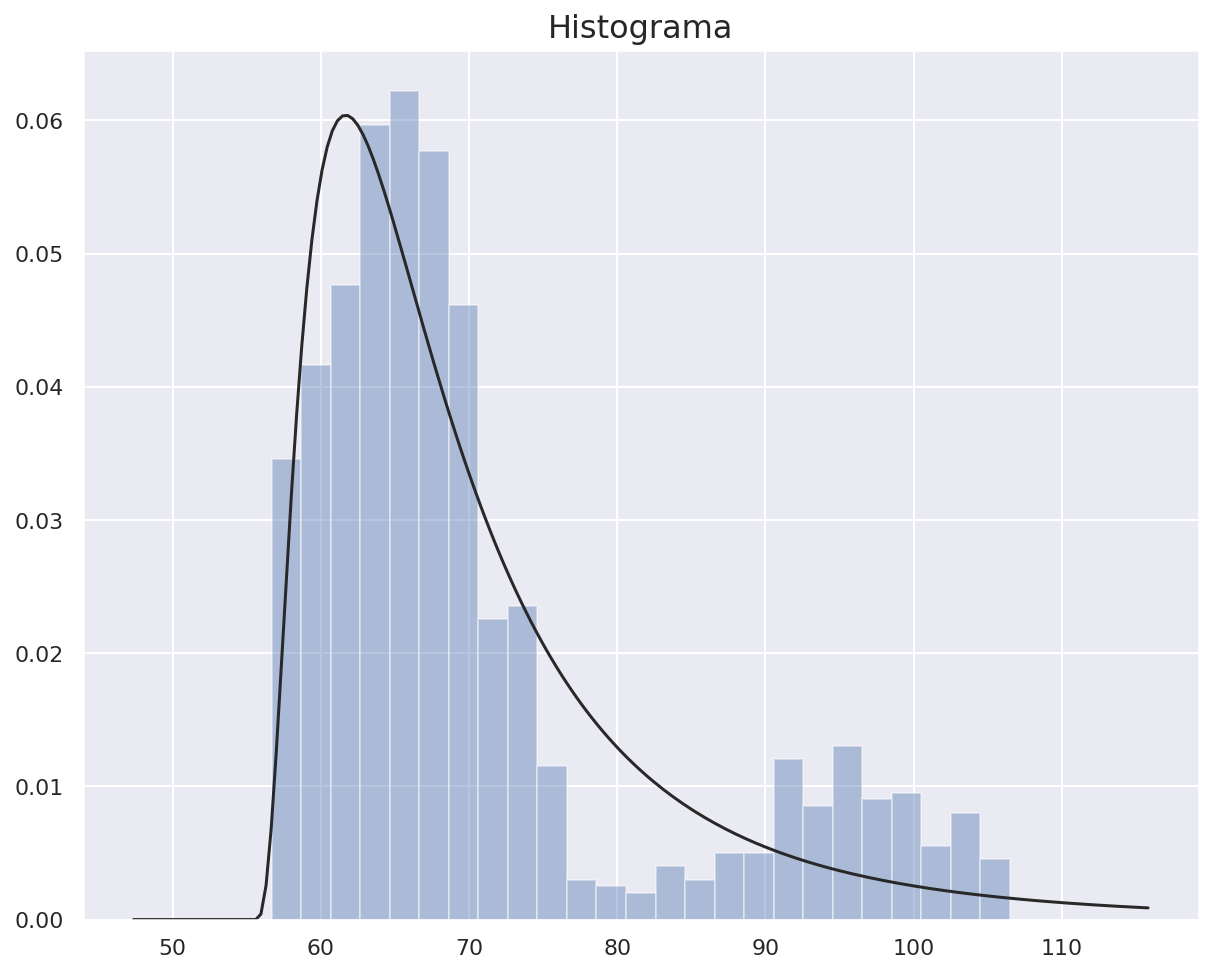

In [25]:
from numpy.random.mtrand import lognormal
# Histograma datos

fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.set() 

# Histograma
sns.distplot(mbg_sn,  kde=False, fit=scs.lognorm, ax=ax)
# sns.distplot(mbg_sn,  kde=False, ax=ax, fit=norm)
ax.set_title('Histograma', fontsize=16)

# Guardar la imagen
# plt.savefig('norm_dist.png')
# plt.savefig('norm_dist.pdf')

## AUTOCORRELACION PARCIAL

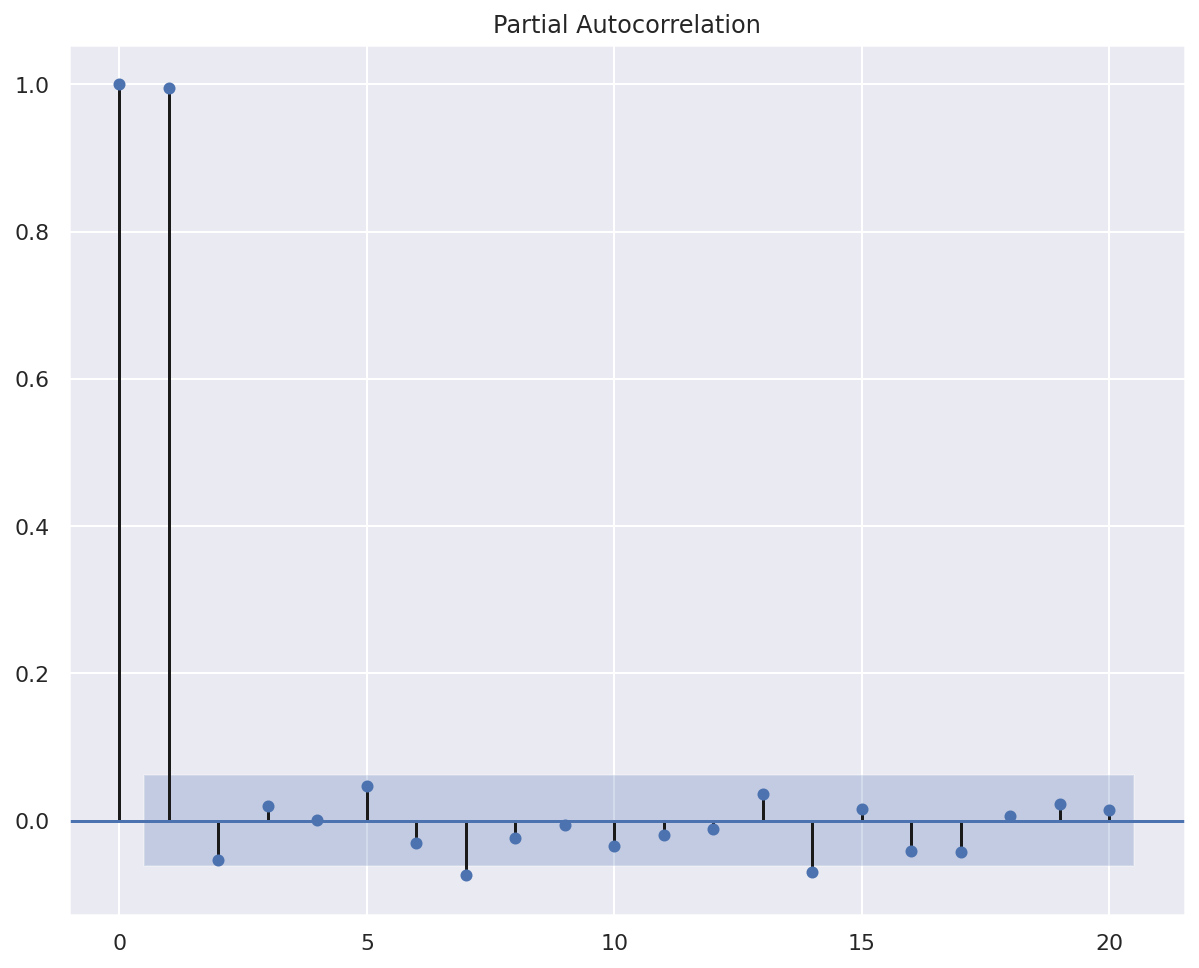

In [18]:
# La sln numerica (Euler-Maruyama) es un proceso autorregresivo de orden 1
plt.rc("figure", figsize=(10,8))
plot_pacf(np.transpose(mbg_sn.reshape(N+1)), lags=20)
pyplot.show()

## ANALISIS DE LOS RETORNOS INSTANTANEOS

### Los retornos de un proceso que se pueda modelar como un MBG deben ser normales

In [20]:
rtn = mbg_df.mbg_sn.pct_change()
rtn_inst = rtn.drop(index=0)
rtn_inst

1      -0.008095
2       0.007572
3      -0.006343
4      -0.007629
5      -0.002032
          ...   
996    -0.002927
997     0.019745
998    -0.003894
999     0.007567
1000   -0.014198
Name: mbg_sn, Length: 1000, dtype: float64

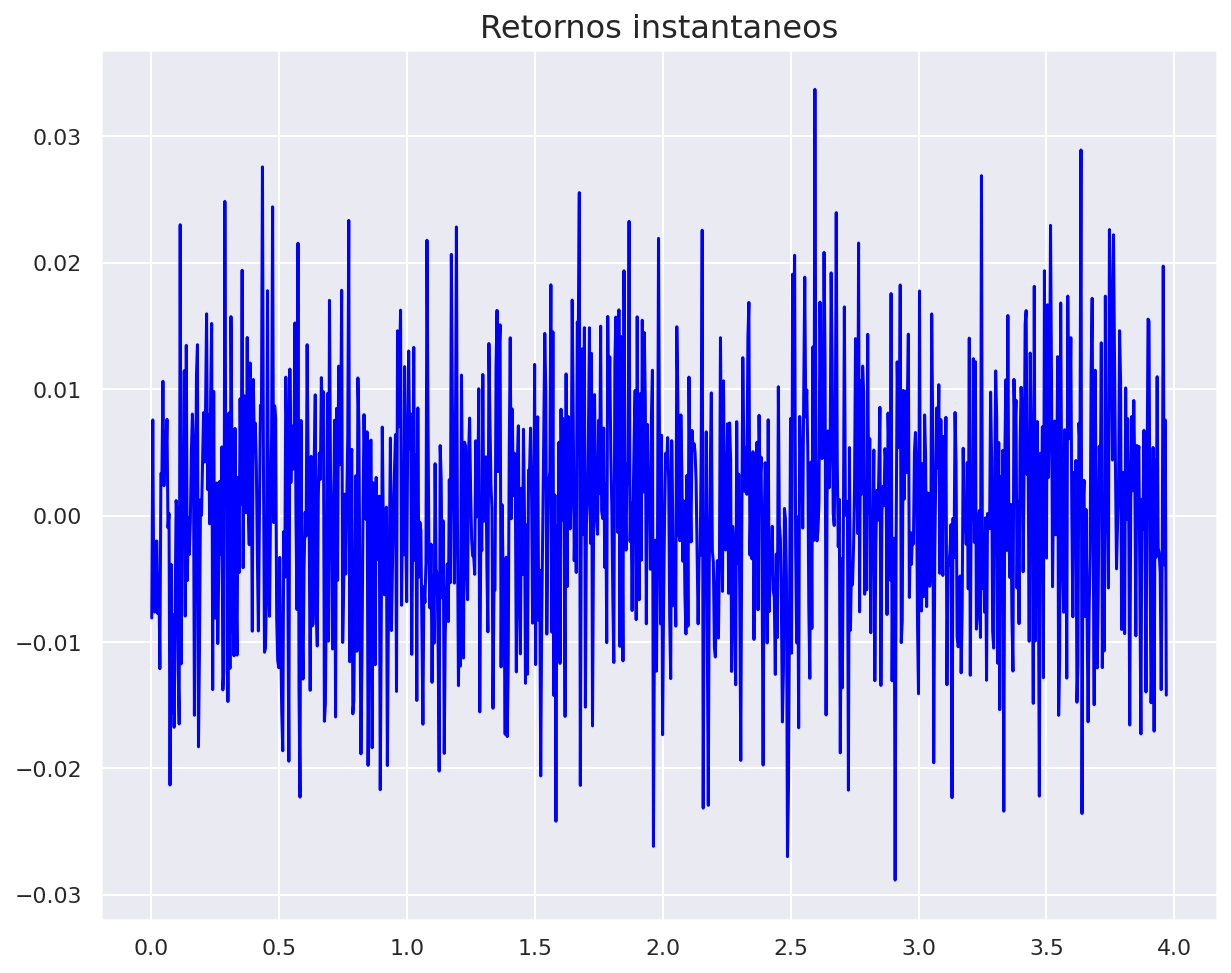

In [21]:
tim2 = np.delete(tim, 0)
# Gráfica
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('Retornos instantaneos', fontsize=16)
ax.plot(tim2, rtn_inst, 'blue')
ax.grid(True)

In [22]:
# ESTADISTICOS DE LOS RETORNOS INSTANTANEOS

calc_stats(rtn_inst)

  Estadísticos        Valores
------------------------------
        tamano       1000.000
           min         -0.029
           max          0.034
         media          0.000
          desv          0.010
          sesg          0.035
          kurt          2.992


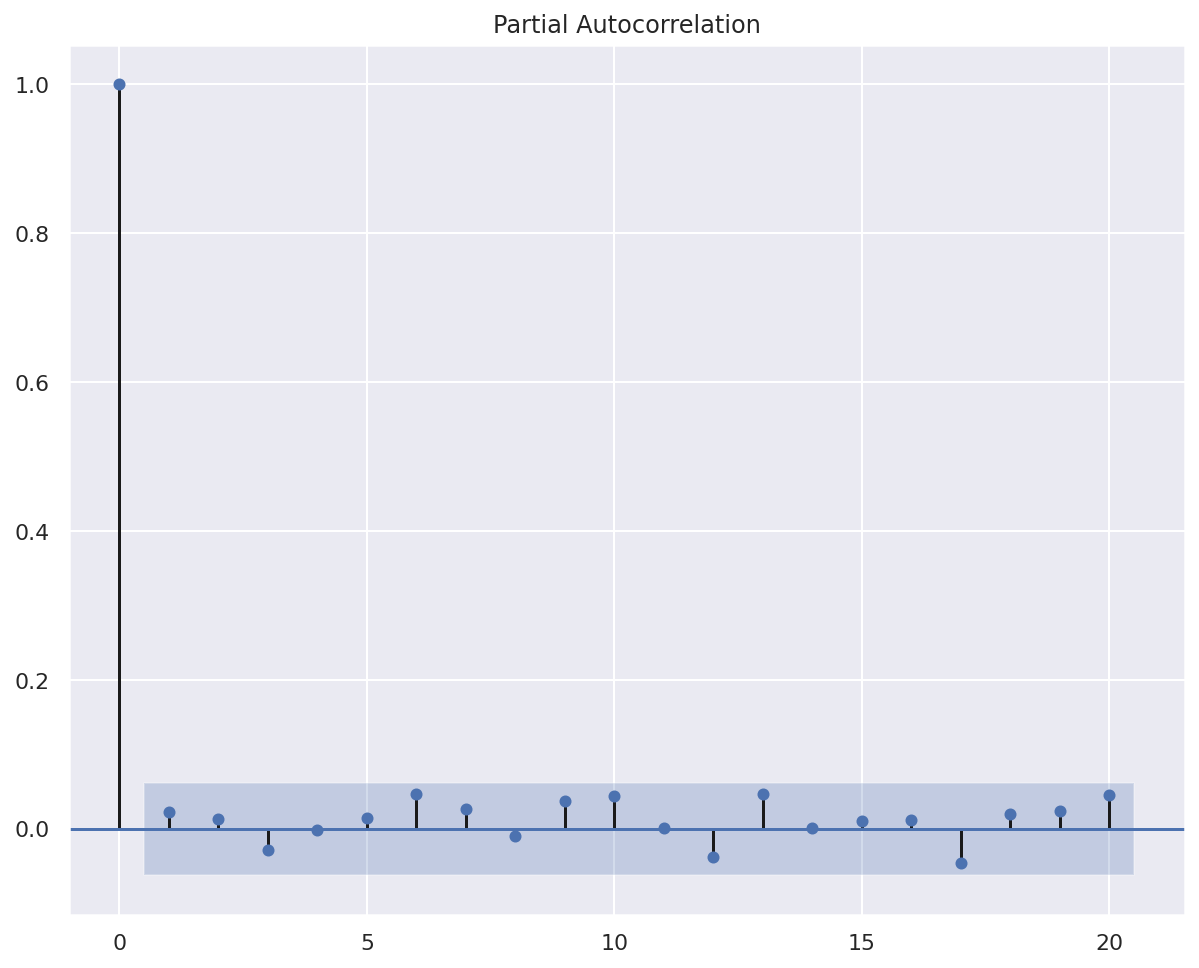

In [23]:
# LOS RETORNOS DEBEN SER INDEPENDIENTES DE CUALQUIER RESAGO (COMPLETAMENTE ALEATORIOS --> RUIDO BLANCO)
plot_pacf(rtn_inst, lags=20)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'QQ-Plot')

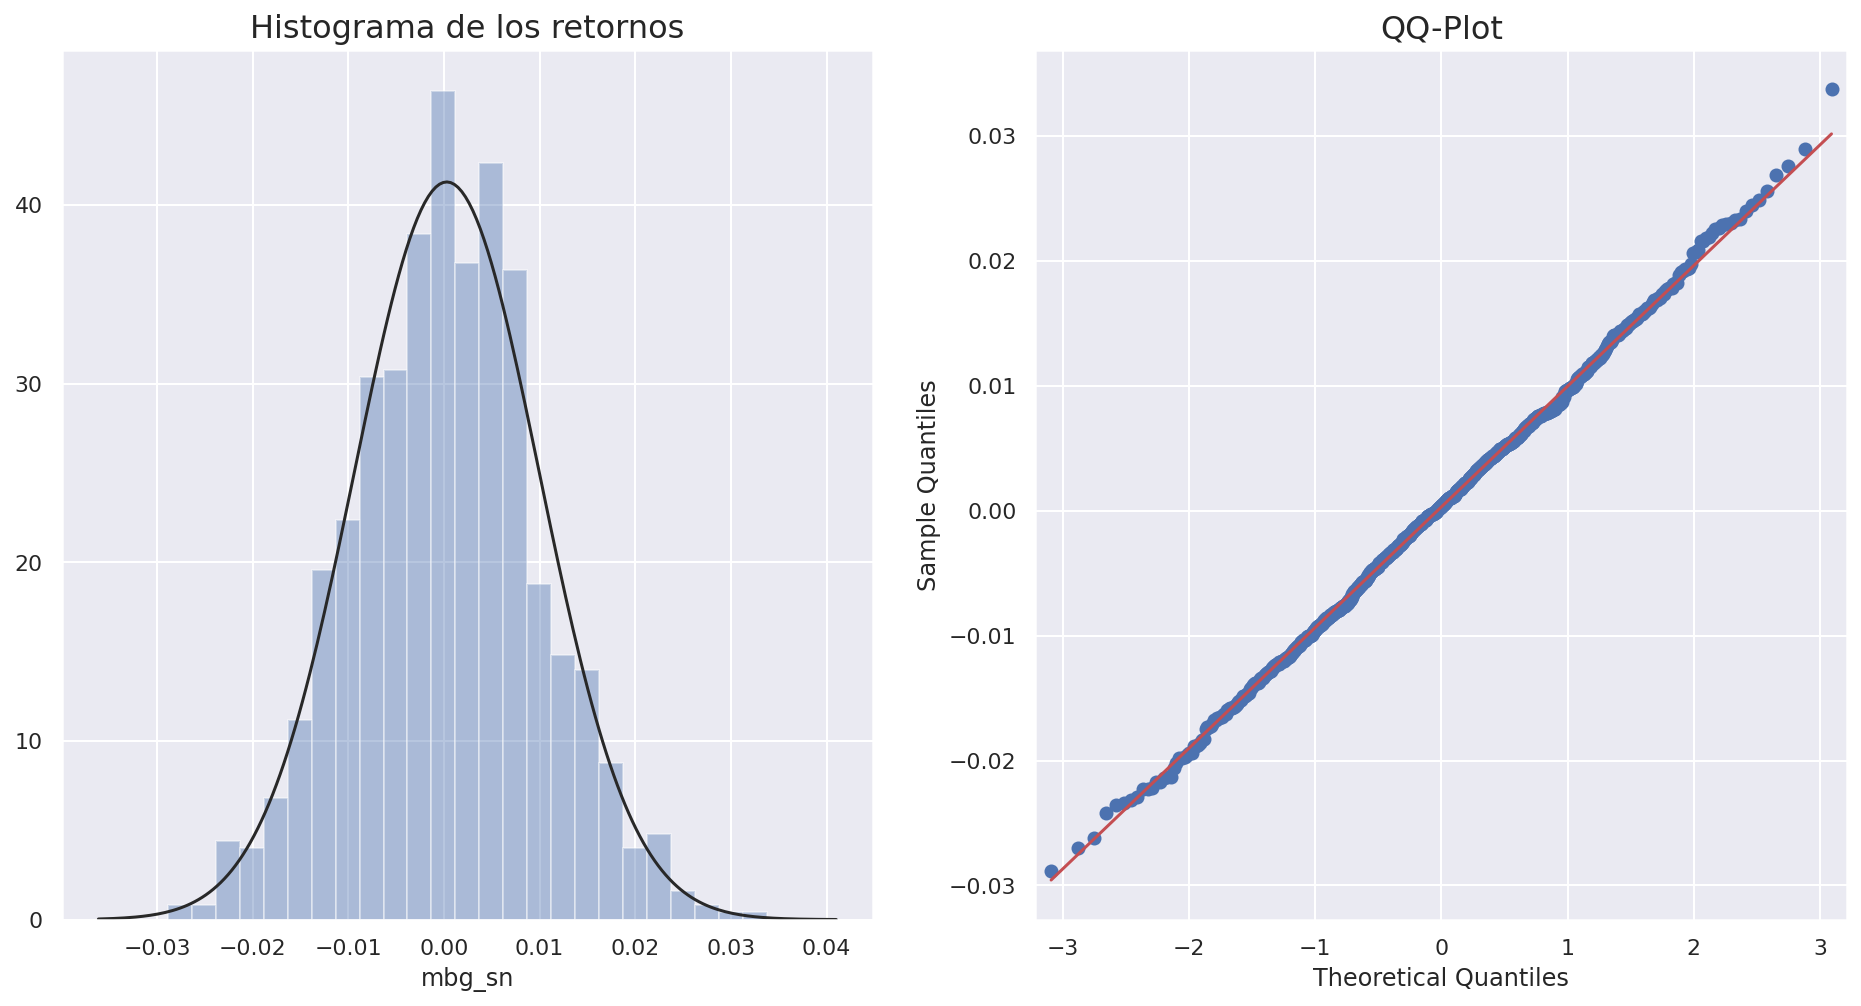

In [24]:
# Histograma de los retornos instantaneos

fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.set() 

# Histograma
sns.distplot(rtn_inst,  kde=False, ax=ax[0], fit=norm)
ax[0].set_title('Histograma de los retornos', fontsize=16)

# QQ-Plot
qq = sm.qqplot(rtn_inst, line='s', ax=ax[1])
ax[1].set_title('QQ-Plot', fontsize=16)

# Guardar la imagen
# plt.savefig('norm_dist.png')
# plt.savefig('norm_dist.pdf')

## TEST DE NORMALIDAD

In [25]:
# Jarque-Bera
# Ideal tener mas de 2000 datos muestrales

# The Jarque-Bera test, tests whether the sample data has the skewness and kurtosis matching a normal distribution.
# H0: La distribución de los datos es normal

stat, p = scs.jarque_bera(rtn_inst)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.202, p=0.904

Probably Gaussian


In [26]:
# Kolmogorov-Smirnov

# Se debe estandarizar la variable aleatoria
# Compara qué tanto la distribución acumulada se desvía de la distribución acumulada de la normal (estándar !).
# H0: La distribución de los datos es normal

stat, p = scs.kstest((rtn_inst-rtn_inst.mean())/rtn_inst.std(), 'norm')
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.024, p=0.592

Probably Gaussian


In [27]:
# Anderson-Darling

# Compara qué tanto la distribución acumulada de los datos se desvía de la distribución acumulada de la normal.

# H0: La distribución de los datos es normal
# If the returned statistic is larger than these critical values then
# for the corresponding significance level, the null hypothesis that
# the data come from the chosen distribution can be rejected.

result = scs.anderson(rtn_inst)
print('stat=%.3f' % (result.statistic))
for i in range (len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print(f'Probably Gaussian: {crit_val} critical value at {sig_lev} level of significance')
  else:
    print(f'Probably not Gaussian: {crit_val} critical value at {sig_lev} level of significance')

stat=0.313
Probably Gaussian: 0.574 critical value at 15.0 level of significance
Probably Gaussian: 0.653 critical value at 10.0 level of significance
Probably Gaussian: 0.784 critical value at 5.0 level of significance
Probably Gaussian: 0.914 critical value at 2.5 level of significance
Probably Gaussian: 1.088 critical value at 1.0 level of significance


In [28]:
# Shapiro-Wilk
# Tests whether a random sample comes from (specifically) a normal distribution. 

stat, p = scs.shapiro(rtn_inst)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.999, p=0.850

Probably Gaussian


## PRUEBA DE VARIANZA CONSTANTE DE LOS RETORNOS

In [29]:
# Retornos al cuadrado
rtn_inst2 = rtn_inst**2

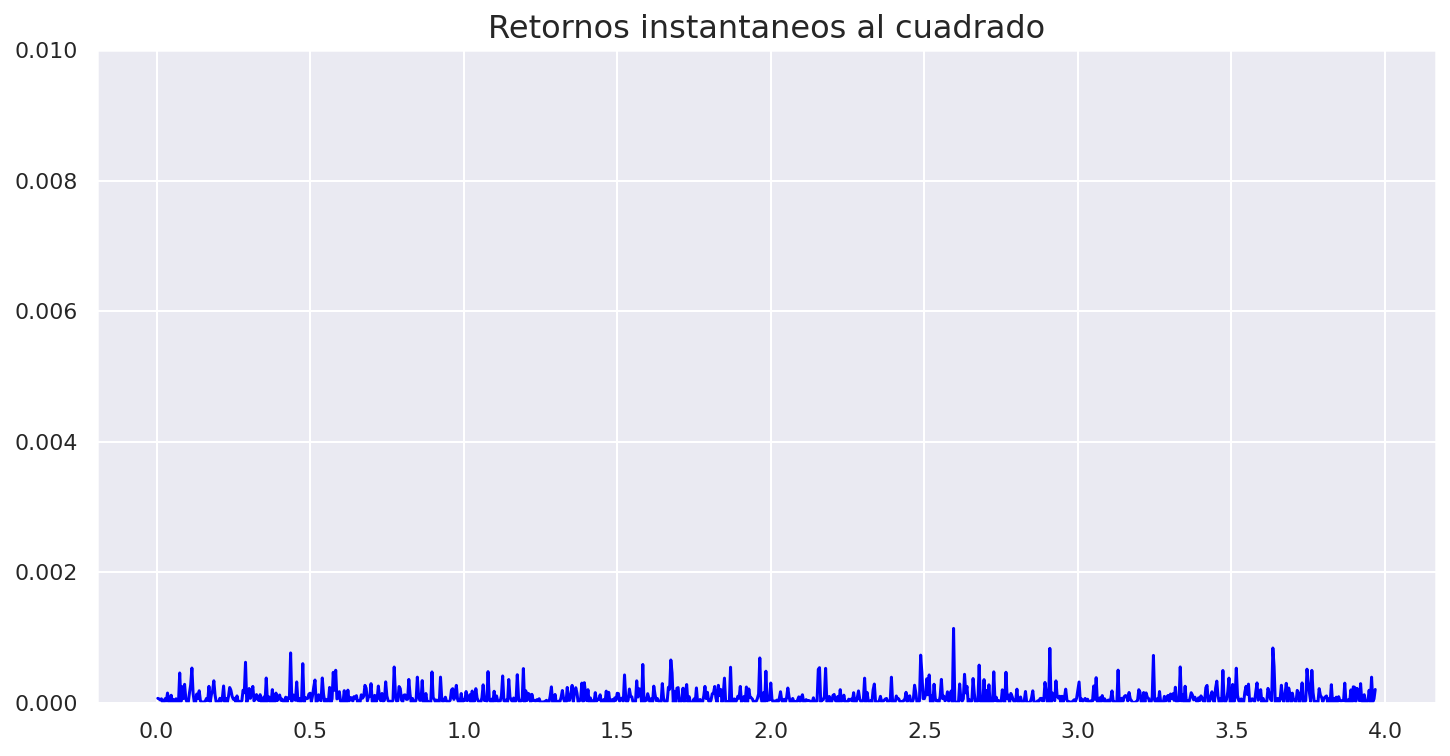

In [30]:
# Gráfica
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.set_title('Retornos instantaneos al cuadrado', fontsize=16)
plt.ylim(0,0.01)
ax.plot(tim2, rtn_inst2, 'blue')
ax.grid(True)

In [31]:
# Varianza y Volatilidad dinámicas
# Comienzan con el primer dato y terminan con todos los datos

VR = np.zeros(N)
VE = np.zeros(N)

for x in range(N):
  VR[x] = (rtn_inst[0:x+1].std())**2
  VE[x] = rtn_inst[0:x+1].std()/np.sqrt(dt)


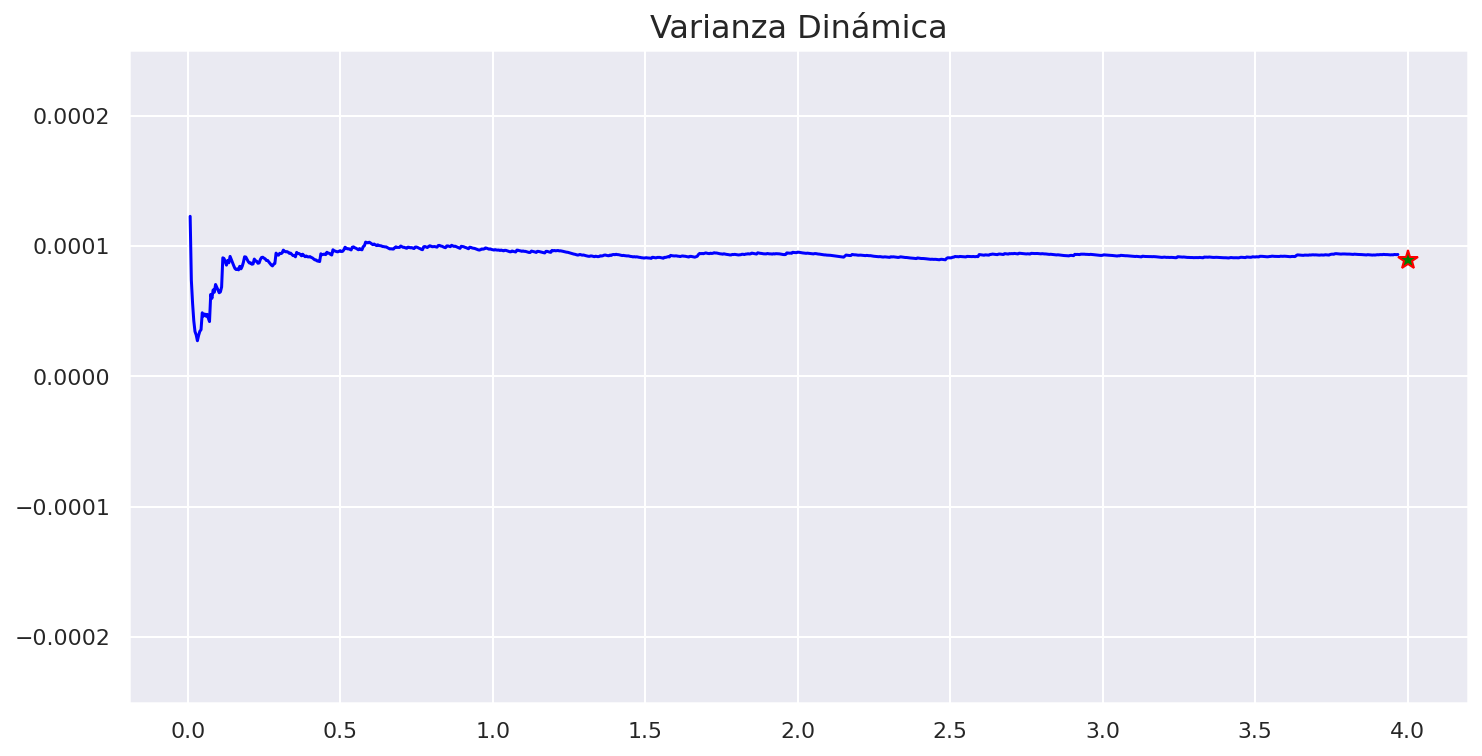

In [42]:
# Gráfica
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.set_title('Varianza Dinámica', fontsize=16)
ax.plot(tim2, VR, 'blue')
plt.ylim(-0.00025,0.00025)
# La varianza dinámica tiende a la varianza de los retornos sigma**2 * dt
x1=[4]
y1=[sigma**2*dt]
ax.plot(x1, y1, marker="*", markersize=10, markeredgecolor="red", markerfacecolor="green")
ax.grid(True)

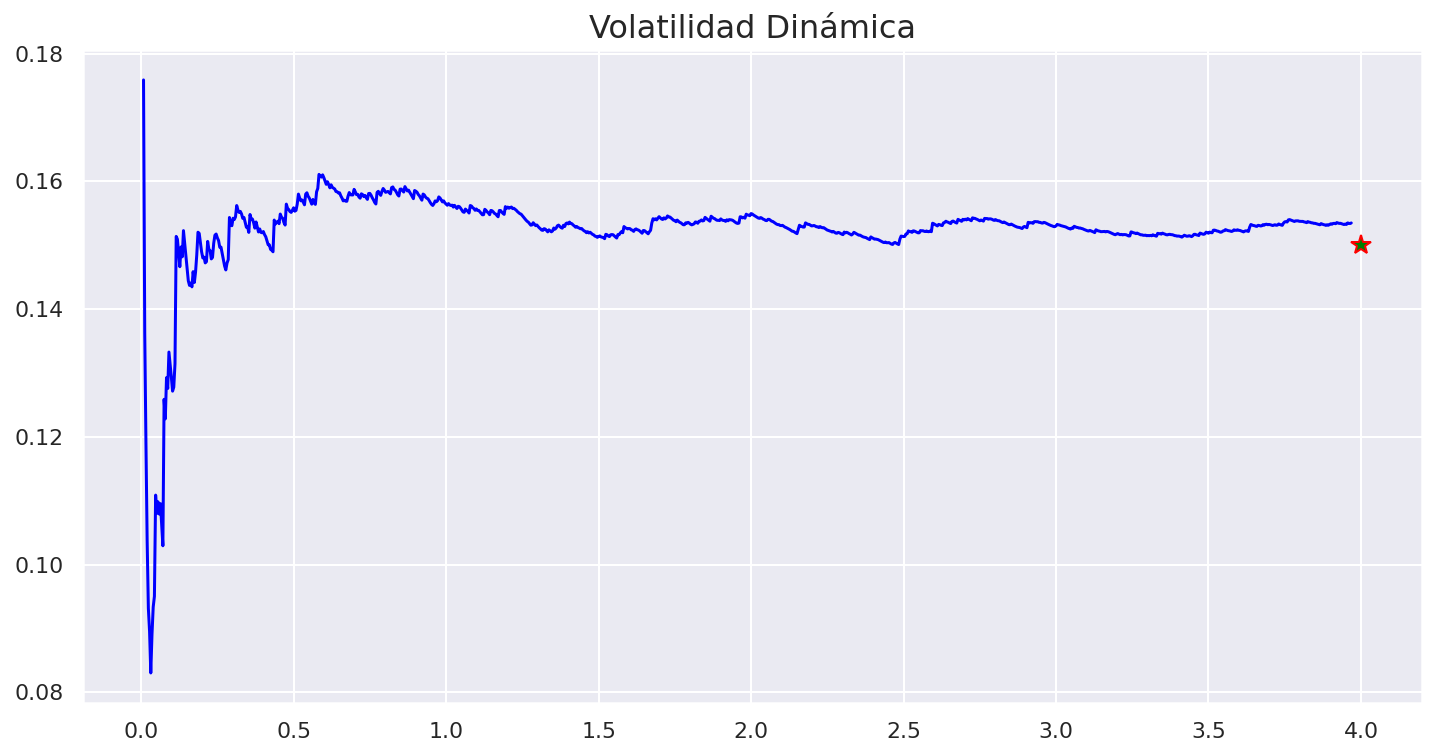

In [48]:
# Gráfica
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.set_title('Volatilidad Dinámica', fontsize=16)
ax.plot(tim2, VE, 'blue')
# La volatilidad dinámica tiende a la volatilidad actual sigma del MBG simulado
x1=[4]
y1=[sigma]
ax.plot(x1, y1, marker="*", markersize=10, markeredgecolor="red", markerfacecolor="green")
ax.grid(True)

In [47]:
# Estimación de la varianza y la volatilidad

var_est = VR[N-1]
vol_est = VE[N-1]

np.array([[sigma**2*dt, sigma], [var_est, vol_est]])

array([[8.92857143e-05, 1.50000000e-01],
       [9.34737308e-05, 1.53477621e-01]])

## EXPONENTE DE HURST

Cuantifica el caracter aleatorio exhibido en la estructura de una serie de tiempo mediante una medida de auto-correlación.

Toma valores entre 0 y 1 donde:

*   H=0.5 señala un proceso puramente aleatorio.
*   H>0.5 señala un proceso que presenta tendencia.
*   H < 0.5 señala un proceso que presenta reversión a la media.






In [ ]:
# Función para calcular el exponente de Hurst

def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

In [ ]:
HE = get_hurst_exponent(mbg_sn.reshape(N+1))
HE

0.51276205715325

## DIMENSION FRACTAL

Contiene información acerca de la estructura geométrica en múltiples escalas de una serie de tiempo.



*   HE + FD = 2 --> 1 < FD < 2 (la dimensión fractal toma valores entre 1 y 2)
*   FD = 1.5 --> El proceso es puramente aleatorio.
*   1 < FD < 1.5 --> El proceso presenta tendencia.
*   1.5 < FD < 2 --> El proceso presenta reversión a la media.



In [ ]:
# Función para calcular la dimensión fractal con el enfoque de Higuchi

def hFD(a, k_max):  #Higuchi FD
   L = []
   x = []
   N = len(a)
   for k in range(1,k_max):
     Lk = 0
     for m in range(0,k):
       #we pregenerate all idxs
       idxs = np.arange(1,int(np.floor((N-m)/k)),dtype=np.int32)
       Lmk = np.sum(np.abs(a[m+idxs*k] - a[m+k*(idxs-1)]))
       Lmk = (Lmk*(N - 1)/(((N - m)/ k)* k)) / k
       Lk += Lmk

     L.append(np.log(Lk/(m+1)))
     x.append([np.log(1.0/ k), 1])

   (p, r1, r2, s)=np.linalg.lstsq(x, L)
   return p[0]

In [ ]:
DF= hFD(mbg_sn.reshape(N+1), 4)
DF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



1.5041160365972577

In [ ]:
# La suma de la dimensión fractal y el exponente de hurst debe ser cercana a 2

DF + HE 

2.0168780937505075

## ESTIMACION Y PRONOSTICO

## VALIDACIÓN DEL MODELO

### ESTIMACION DE PARAMETROS

In [ ]:
# Media estimada
mu_est = rtn_inst.mean()/dt
# Volatilidad estimada
sig_est = rtn_inst.std()/np.sqrt(dt)
# Comparación de los parámetros estimados con los "reales"
params = np.array([[mu, sigma], [mu_est, sig_est]])
params

array([[ 0.07      ,  0.15      ],
       [-0.03395994,  0.1548269 ]])

### VALIDACION

In [ ]:
# MBE

# "Choques" aleatorios
dB2 = np.random.normal(scale= np.sqrt(dt), size=(n_sims, N))

# Sln Numerica validación

mbg_snv = np.delete(mbg_sn, N, axis=1)
val_mbg = 1+mu_est*dt+sig_est*dB2


mbg_s2 = mbg_snv*val_mbg
mbg_sf = np.insert(mbg_s2, 0, mbg_0, axis=1)


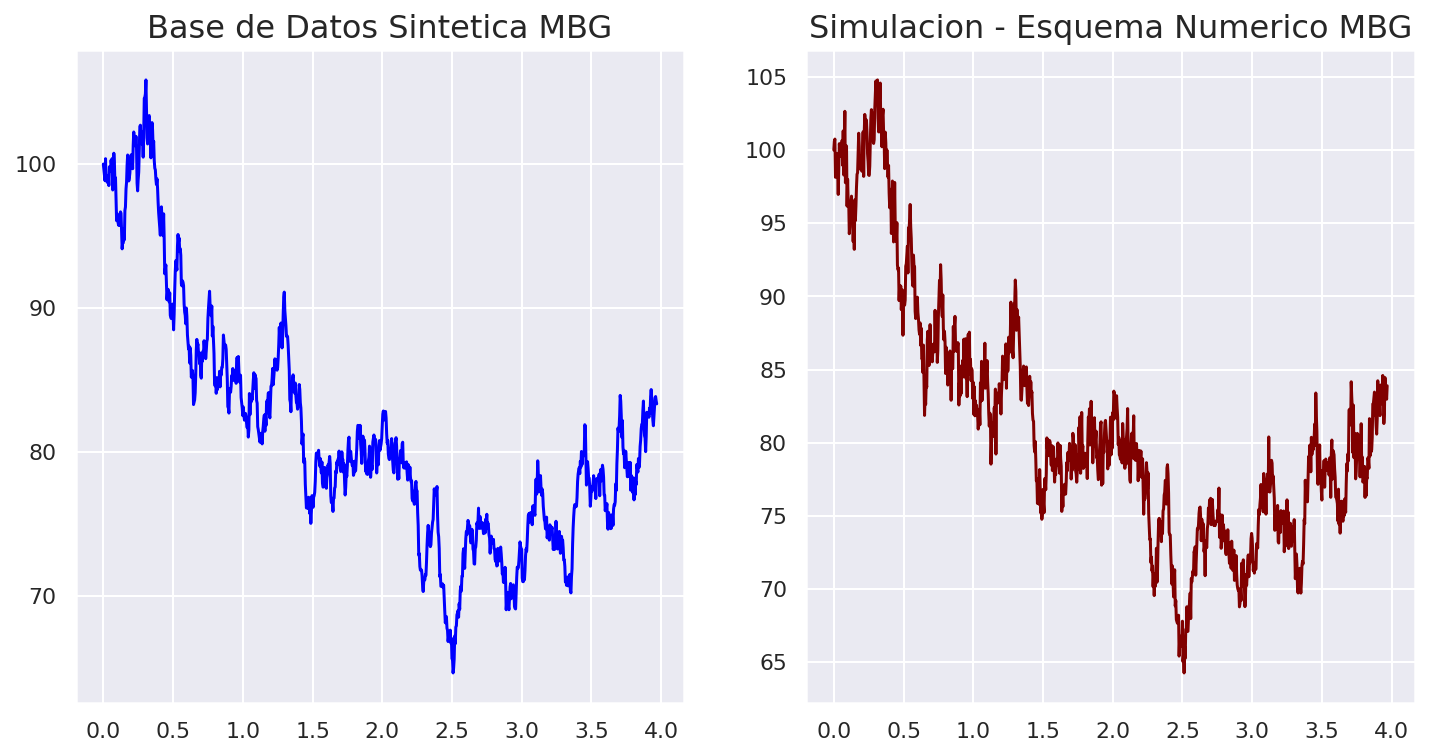

In [ ]:
# Gráfica
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_title('Base de Datos Sintetica', fontsize=16)
ax[1].set_title('Simulacion - Esquema Numerico', fontsize=16)
ax[0].plot(tim, np.transpose(mbg_sn), 'blue')
ax[1].plot(tim, np.transpose(mbg_sf), 'maroon')
# Línea de tendencia
#ax[0].plot(tim, mbg_0*np.exp(mu*tim), 'g')
#ax[1].plot(tim, mbg_0*np.exp(mu*tim), 'g')
ax[0].grid(True)
ax[1].grid(True)

In [ ]:
mbgs_df = pd.DataFrame({'time': tim, 'mbg_sn': mbg_sn.reshape(N+1), 'mbg_sf': mbg_sf.reshape(N+1)})
mbgs_df

,time,mbg_sn,mbg_sf
0,0.000000,100.000000,100.000000
1,0.003968,99.599648,100.590961
2,0.007937,99.132664,100.746773
3,0.011905,98.845036,98.133894
4,0.015873,100.370724,98.367932
...,...,...,...
996,3.952381,83.112878,84.457126
997,3.956349,83.750435,83.492594
998,3.960317,83.841956,83.457674
999,3.964286,83.547580,82.975693


In [ ]:
fig = px.line(mbgs_df, x='time', y=['mbg_sn', 'mbg_sf'], title='Datos sinteticos vs Modelo numerico', width=1024, height=720)
fig.show()

### ERROR DE AJUSTE

In [ ]:
# ERROR PORCENTUAL ABSOLUTO

APE = np.abs((mbg_sn - mbg_sf)/mbg_sn)
APE

array([[0.        , 0.00995297, 0.01628231, ..., 0.00458341, 0.00684504,
        0.00676871]])

In [ ]:

# ERROR PORCENTUAL ABSOLUTO MEDIO 

MAPE = APE.mean()
MAPE

0.01128807869363304

## ANALISIS DE LOS RETORNOS DEL MODELO SIMULADO

In [ ]:
rtns = mbgs_df.mbg_sf.pct_change()
rtns_inst = rtns.drop(index=0)
rtns_inst

1       0.005910
2       0.001549
3      -0.025935
4       0.002385
5       0.014241
          ...   
996     0.029305
997    -0.011420
998    -0.000418
999    -0.005775
1000    0.011092
Name: mbg_sf, Length: 1000, dtype: float64

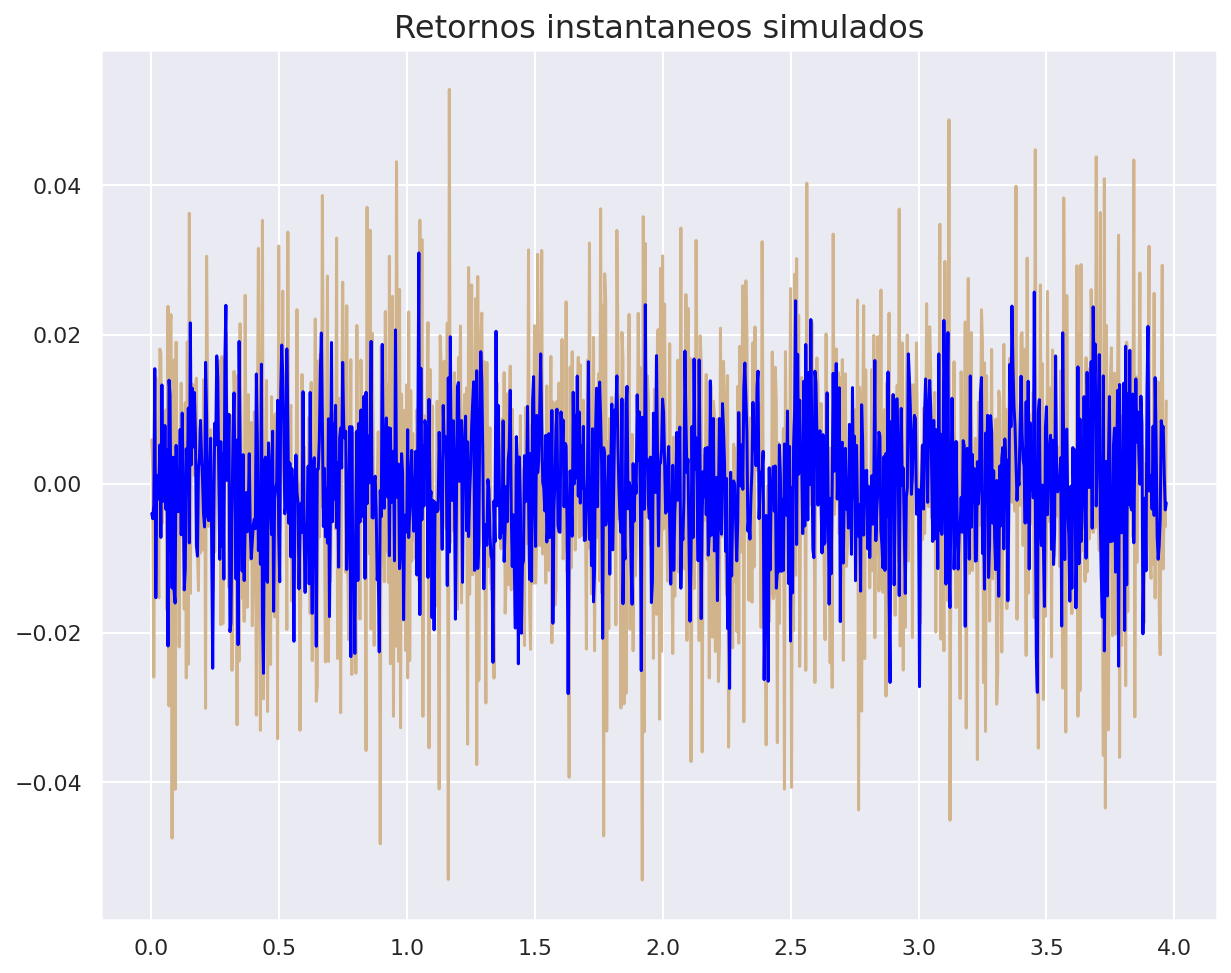

In [ ]:
# Gráfica
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('Retornos instantaneos simulados', fontsize=16)
ax.plot(tim2, rtns_inst, 'tan')
ax.plot(tim2, rtn_inst, 'blue')
ax.grid(True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'QQ-Plot')

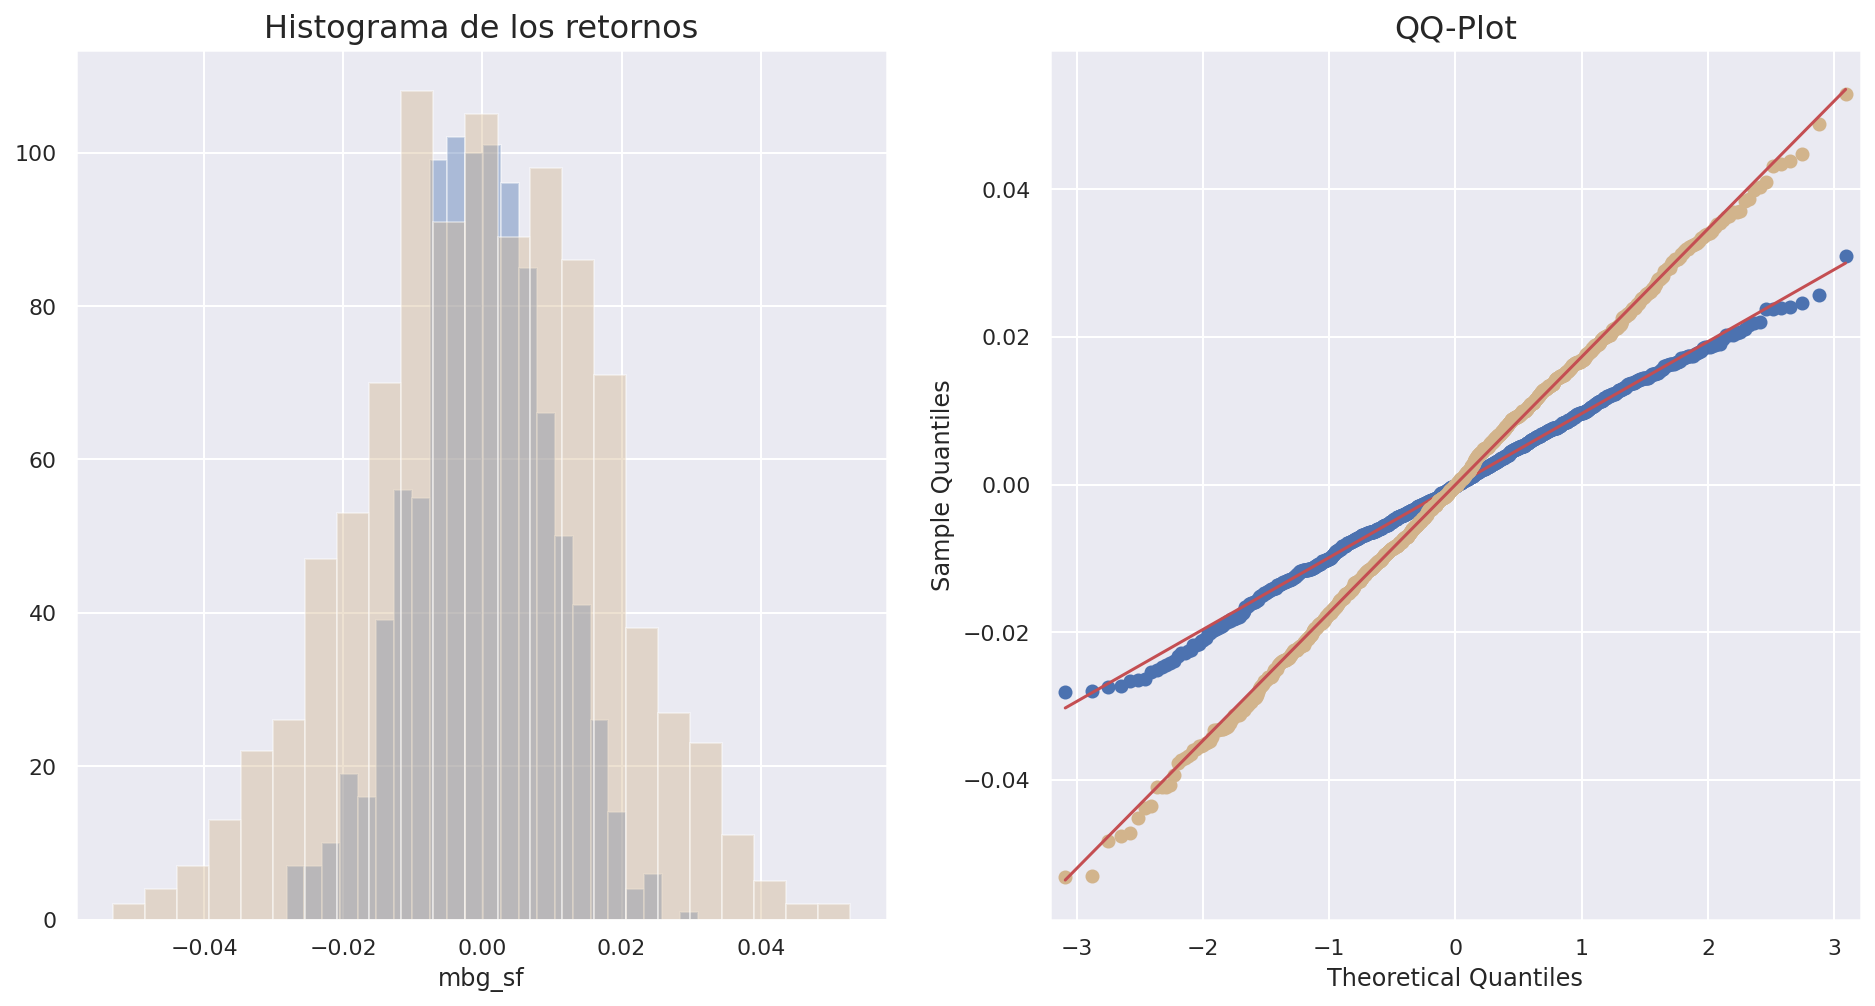

In [ ]:
# Histograma de los retornos instantaneos sinteticos vs simulados

fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.set() 
# https://indianaiproduction.com/seaborn-histogram-using-seaborn-distplot/
# Histograma
sns.distplot(rtn_inst,  kde=False, ax=ax[0])
sns.distplot(rtns_inst,  kde=False, ax=ax[0], color='tan')
ax[0].set_title('Histograma de los retornos', fontsize=16)

# QQ-Plot
qq = sm.qqplot(rtn_inst, line='s', ax=ax[1])
qqs = sm.qqplot(rtns_inst, line='s', ax=ax[1], color='tan')
ax[1].set_title('QQ-Plot', fontsize=16)
# Guardar la imagen
# plt.savefig('norm_dist.png')
# plt.savefig('norm_dist.pdf')

In [ ]:
# ESTADISTICOS DE LOS RETORNOS INSTANTANEOS

print(calc_stats(rtn_inst))
print(calc_stats(rtns_inst))

  Estadísticos        Valores
------------------------------
        tamano       1000.000
           min         -0.028
           max          0.031
         media         -0.000
          desv          0.010
          sesg         -0.104
          kurt          2.928
None
  Estadísticos        Valores
------------------------------
        tamano       1000.000
           min         -0.053
           max          0.053
         media         -0.000
          desv          0.017
          sesg         -0.085
          kurt          2.867
None


## ERROR PUNTUAL

Los errores puntuales de ajuste deben ser normales, aleatorios

In [ ]:
# Error puntual de ajuste
err_p = mbg_sn - mbg_sf

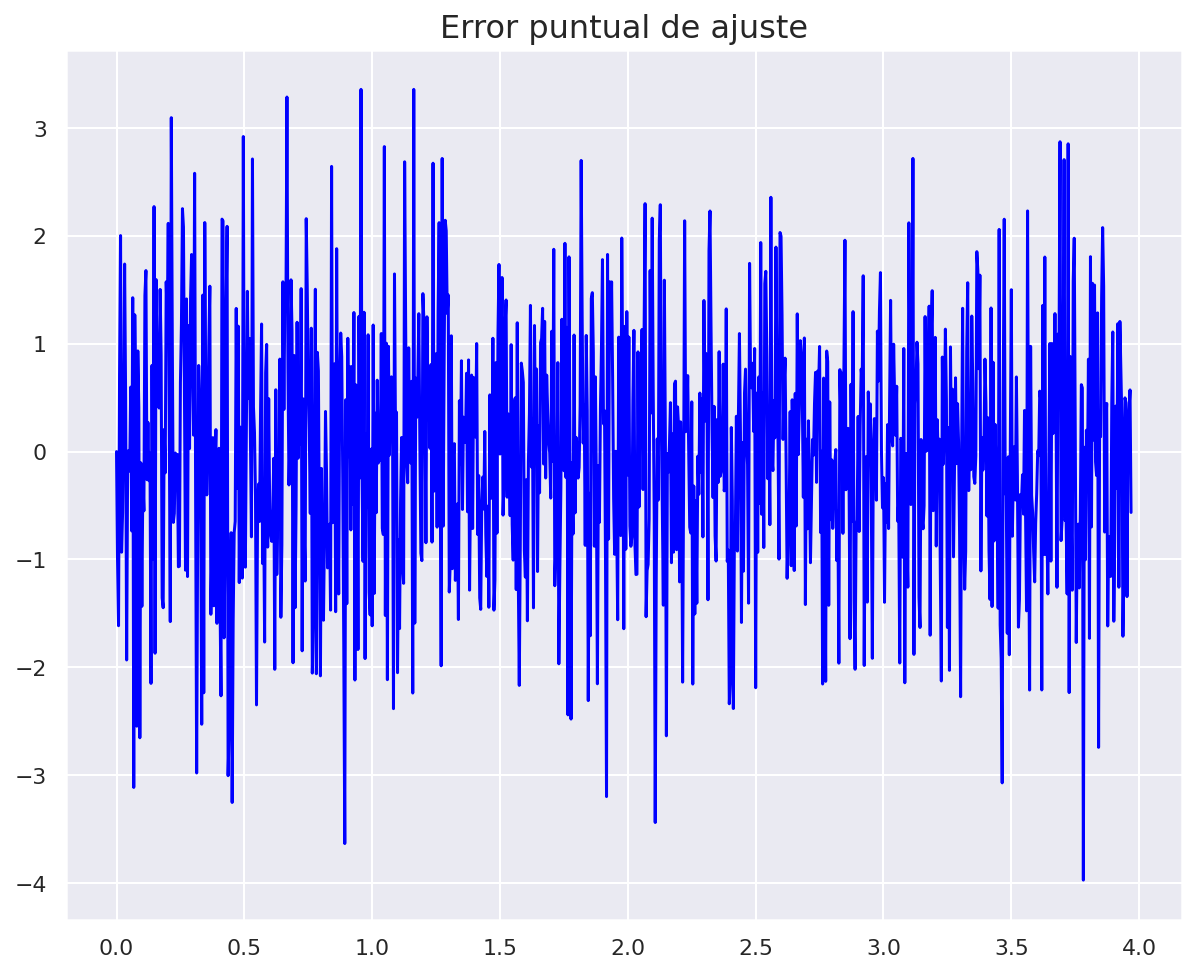

In [ ]:
# Gráfica
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('Error puntual de ajuste', fontsize=16)
ax.plot(tim, err_p.reshape(N+1), 'blue')
ax.grid(True)

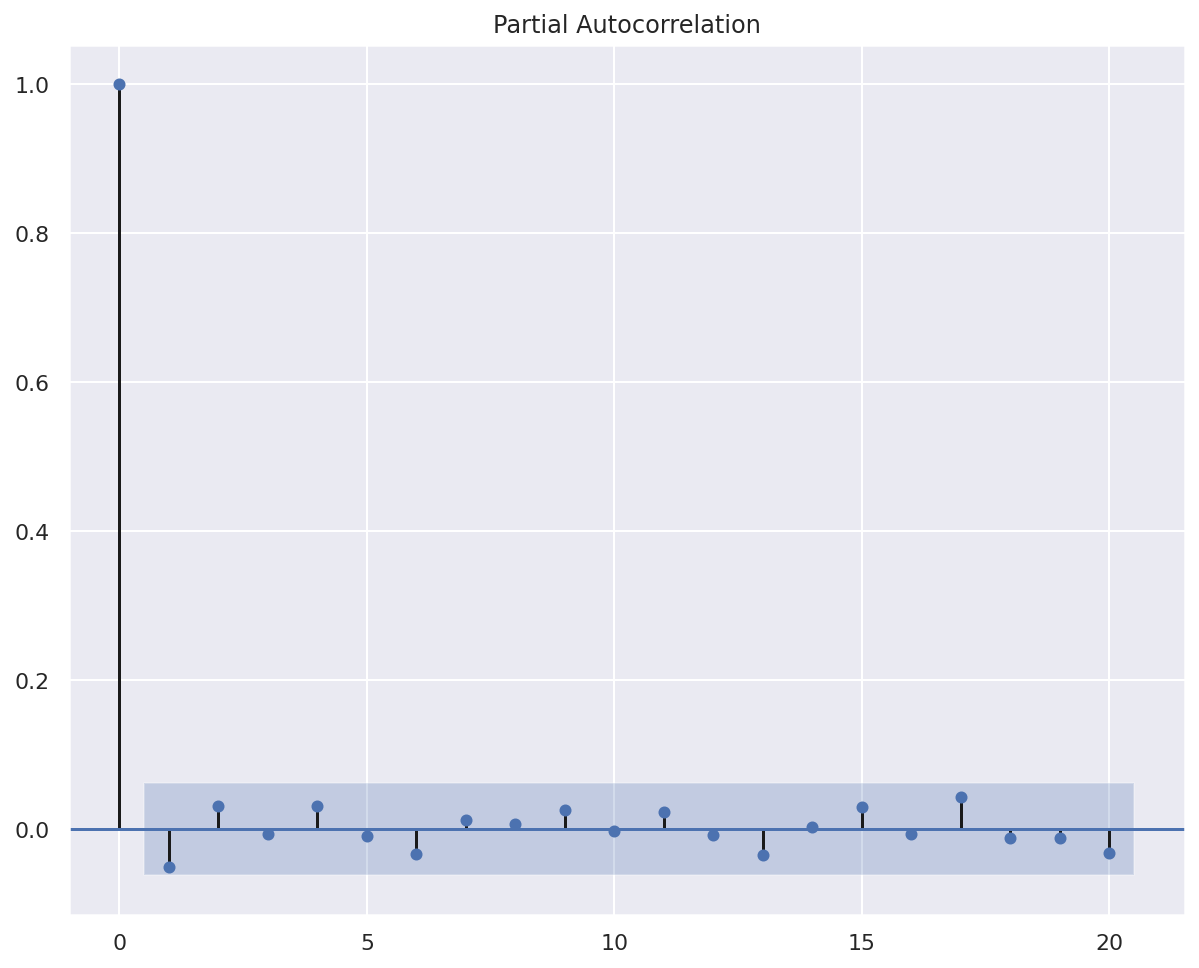

In [ ]:
# Si todos los bastones están dentro de la banda de confianza azul, los errores son aleatorios
plot_pacf(err_p.reshape(N+1), lags=20)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'QQ-Plot')

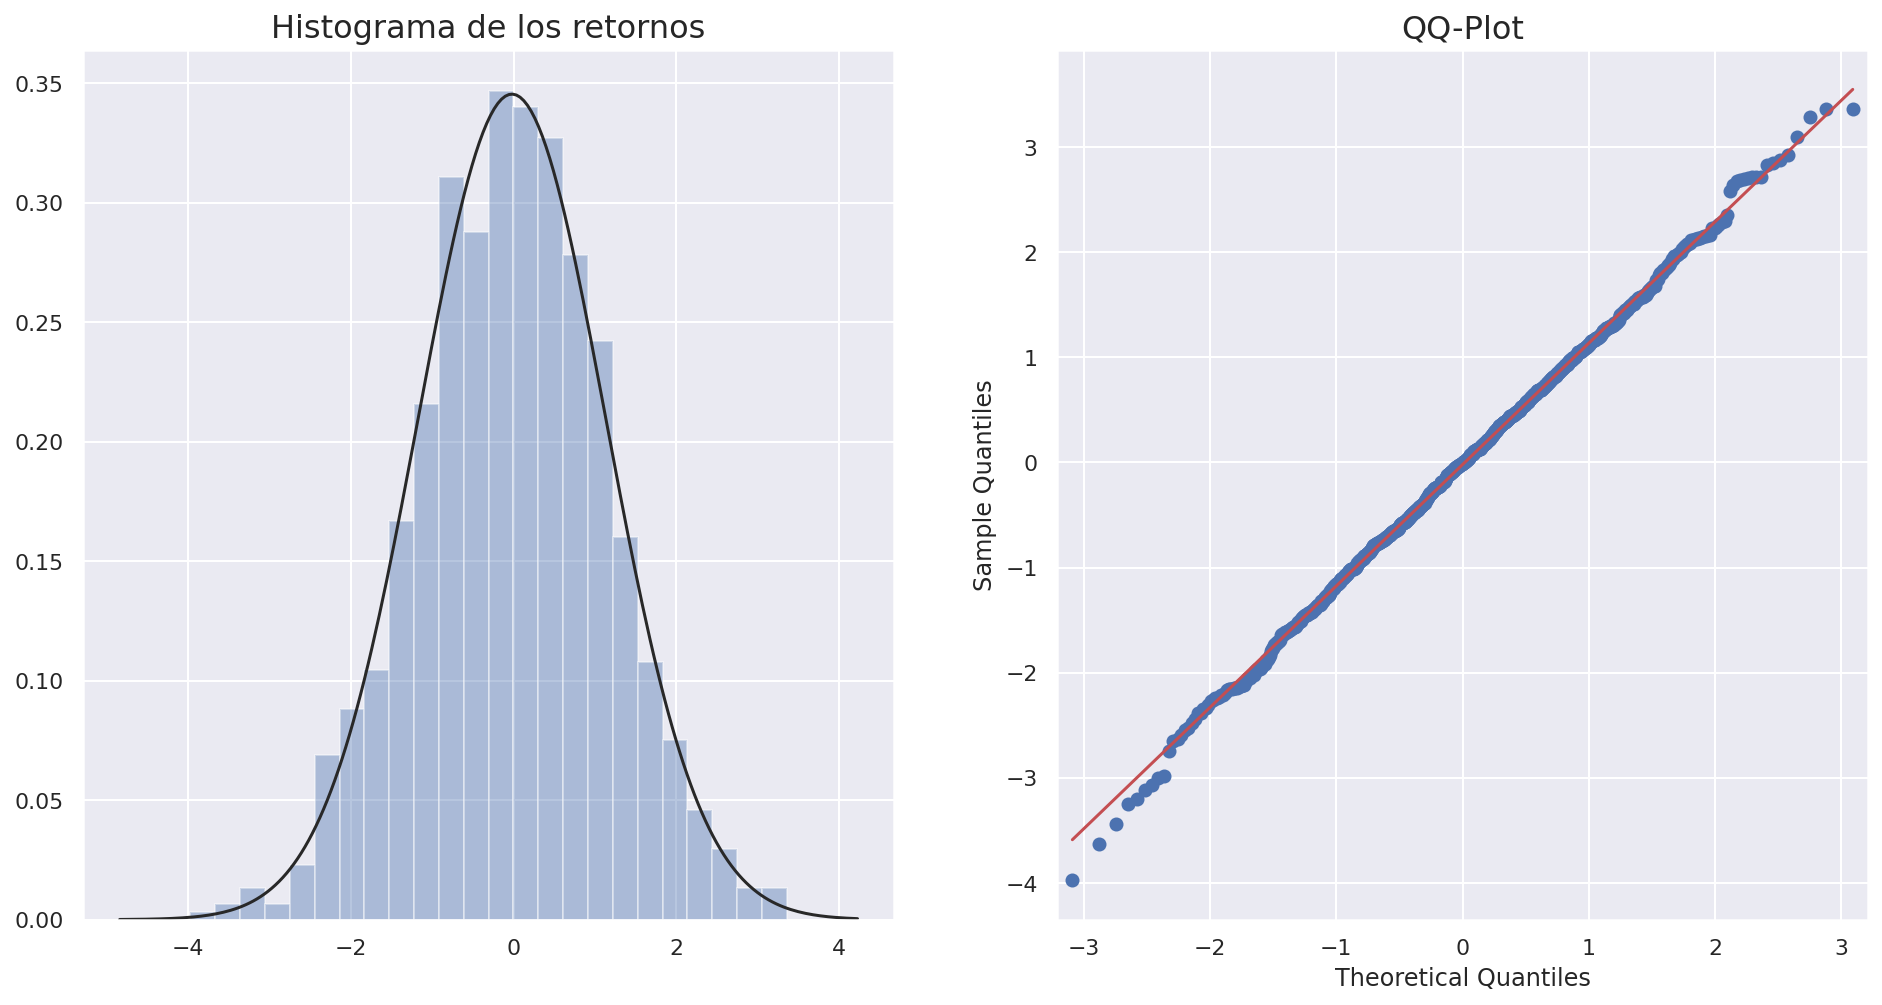

In [ ]:
# Histograma de los errores puntuales

fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.set() 
# https://indianaiproduction.com/seaborn-histogram-using-seaborn-distplot/
# Histograma
sns.distplot(err_p.reshape(N+1),  kde=False, ax=ax[0], fit=norm)
ax[0].set_title('Histograma de los retornos', fontsize=16)

# QQ-Plot
qq = sm.qqplot(err_p.reshape(N+1), line='s', ax=ax[1])
ax[1].set_title('QQ-Plot', fontsize=16)
# Guardar la imagen
# plt.savefig('norm_dist.png')
# plt.savefig('norm_dist.pdf')

### Pruebas de normalidad para los errores puntuales

Deben ser normales

In [ ]:
# Jarque-Bera
# Ideal tener mas de 2000 datos muestrales

# The Jarque-Bera test, tests whether the sample data has the skewness and kurtosis matching a normal distribution.
# H0: La distribución de los datos es normal

stat, p = scs.jarque_bera(err_p)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.485, p=0.785

Probably Gaussian


In [ ]:
# Kolmogorov-Smirnov

# Compara qué tanto la distribución acumulada se desvía de la distribución acumulada de la normal (estándar !).
# H0: La distribución de los datos es normal

stat, p = scs.kstest((err_p.reshape(N+1) - err_p.reshape(N+1).mean())/err_p.reshape(N+1).std(), 'norm')
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.014, p=0.986

Probably Gaussian


In [ ]:
 # Anderson-Darling

# Compara qué tanto la distribución acumulada de los datos se desvía de la distribución acumulada de la normal.

# H0: La distribución de los datos es normal
# If the returned statistic is larger than these critical values then
# for the corresponding significance level, the null hypothesis that
# the data come from the chosen distribution can be rejected.

result = scs.anderson(err_p.reshape(N+1))
print('stat=%.3f' % (result.statistic))
for i in range (len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print(f'Probably Gaussian: {crit_val} critical value at {sig_lev} level of significance')
  else:
    print(f'Probably not Gaussian: {crit_val} critical value at {sig_lev} level of significance')

stat=0.174
Probably Gaussian: 0.574 critical value at 15.0 level of significance
Probably Gaussian: 0.653 critical value at 10.0 level of significance
Probably Gaussian: 0.784 critical value at 5.0 level of significance
Probably Gaussian: 0.914 critical value at 2.5 level of significance
Probably Gaussian: 1.088 critical value at 1.0 level of significance


In [ ]:
# Shapiro-Wilk
# Tests whether a random sample comes from (specifically) a normal distribution. 

stat, p = scs.shapiro(err_p)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.999, p=0.863

Probably Gaussian
